###  Problem Statement: You will be predicting the costs of used cars given the data collected from various sources and distributed across various locations in India.

**Tasks:** <br>

1.Clean Data(Null value removal, Outlier identification)<br>

2.Null Values(Dropping the rows /Columns which are null).<br>

3.EDA<br>

4.Handle Categorical Variable(Using Label Encoding/One hot encoding).<br>

5.Try to do data scaling for Kilometers driven.<br>

6.Do the train test split.<br>

7.Apply different ML regression Algorithms.<br>

8.Calculate the error metrics.<br>

**Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Import Dataset**

In [2]:
data=pd.read_excel('Data_Train.xlsx')

In [3]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [4]:
data.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

In [5]:
data.shape

(6019, 12)

In [6]:
data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

**Analysis**<br>
This shows us the number of null values in each column.<br>
We see that columns- Mileage(2),Engine(36),Power(36),Seats(42) has null values.<br>
From the above values,it is clear that the columns have very less number of null values and the number of null values are very less than the 30% of number of rows,so we don't remove any columns and will adopt some other methods to get rid of the null values.

**Removing Duplicate values**

In [7]:
duplicate=data.drop_duplicates(['Name','Location','Year','Kilometers_Driven','Fuel_Type','Transmission','Owner_Type','Mileage','Engine','Power','Seats'])

Lets drop the km/l and km/kg from the mileage column and convert it to float so that the further calculations become easy.

In [8]:
data['Mileage'] = data['Mileage'].apply(lambda x : str(x).split(' ')[0]).astype(float)

In [9]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968 CC,140.8 bhp,5.0,17.74


Changing engine and power datatype to float from object by dropping CC and bhp respectively.

In [10]:
data['Engine'] = data['Engine'].apply(lambda x : str(x).split(" ")[0]).astype(float)
data['Power'] = data['Power'].replace('null bhp','0 bhp').apply(lambda x : str(x).split(' ')[0]).astype(float)
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [11]:
data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

As we can see that the mileage column has only two null values,so we remove the rows here.

In [12]:
data = data[data.Mileage.notnull()]
data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

Checking if the engine column has outlier values or not using boxplot

1198.0
1984.0


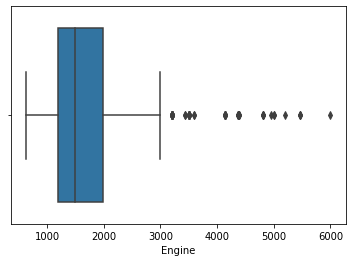

In [13]:
sns.boxplot('Engine',data=data)
Q1 = data.Engine.quantile(0.25)
print(Q1)
Q3 = data.Engine.quantile(0.75)
print(Q3)
IQR = Q3 - Q1

So the above boxplot clearly shows that there are approx 12 outlier values present in the column 'Engine',so we replace the null values with the median of the column.

In [14]:
data['Engine'] = data['Engine'].fillna(data.Engine.median())

In [15]:
data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine                0
Power                36
Seats                42
Price                 0
dtype: int64

Now, we will check the outliers for power column and accordingly will replace the null values with mean or median of the column.

74.0
138.1


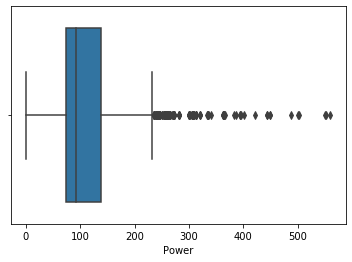

In [16]:
sns.boxplot('Power',data=data)
Q1 = data.Power.quantile(0.25)
print(Q1)
Q3 = data.Power.quantile(0.75)
print(Q3)
IQR = Q3 - Q1

As we can see that the power columns has lot of outlier values so we will replace the null null values with the median of the column.

In [17]:
data['Power'] = data['Power'].fillna(data.Power.median())

In [18]:
data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine                0
Power                 0
Seats                42
Price                 0
dtype: int64

Now we will repeat the same process for the seats column.

5.0
5.0


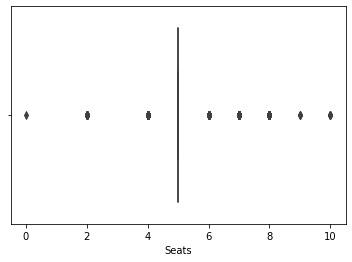

In [19]:
sns.boxplot('Seats',data=data)
Q1 = data.Seats.quantile(0.25)
print(Q1)
Q3 = data.Seats.quantile(0.75)
print(Q3)
IQR = Q3 - Q1

As we can see clearly from the above boxplot that Seats column also has oultier value,so we replace the null values with the median of the seats column.

In [20]:
data['Seats'] = data['Seats'].fillna(data.Seats.median())

In [21]:
data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

So,now we have removed all the null values from our dataframe,so our data is now ready to be processed for further analysis.

## EXPLORATORY DATA ANALYSIS

In [22]:
#Uderstanding the basic information of the data like min, max, mean and standard deviation etc.
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6017.000000,6.017000e+03,6017.000000,6017.000000,6017.000000,6017.000000,6017.000000
mean,2013.358152,5.874228e+04,18.134961,1620.737078,111.134805,5.276882,9.478340
std,3.269967,9.128375e+04,4.582289,599.398319,55.312864,0.806464,11.189605
min,1998.000000,1.710000e+02,0.000000,624.000000,0.000000,0.000000,0.440000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,74.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.150000,1493.000000,92.700000,5.000000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1969.000000,138.030000,5.000000,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


In [23]:
#This displays general information about the dataset with informations like the column names their data types 
#and the count of non-null values for every column.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6017 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6017 non-null   object 
 1   Location           6017 non-null   object 
 2   Year               6017 non-null   int64  
 3   Kilometers_Driven  6017 non-null   int64  
 4   Fuel_Type          6017 non-null   object 
 5   Transmission       6017 non-null   object 
 6   Owner_Type         6017 non-null   object 
 7   Mileage            6017 non-null   float64
 8   Engine             6017 non-null   float64
 9   Power              6017 non-null   float64
 10  Seats              6017 non-null   float64
 11  Price              6017 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 611.1+ KB


In [24]:
#Gives the data types of all the columns values in the dataframe
data.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

As we can see the columns: Name, Location, Fuel_type, Transmission and Owner Type are CATERGORICAL Variables.<br>
As we can see the columns: Year, Kilometers_Driven, Mileage, Engine, Power, Seats and Price are NUMERICAL Variables.

#### Analysing the values of all CATEGORICAL Variables and check the data type of values

In [25]:
#Gives the types of categories present in each categorical variable 
data['Name'].value_counts()

Mahindra XUV500 W8 2WD                  49
Maruti Swift VDI                        45
Honda City 1.5 S MT                     34
Maruti Swift Dzire VDI                  34
Maruti Swift VDI BSIV                   31
                                        ..
Hyundai Accent GLS 1.6                   1
Toyota Corolla Altis D-4D G              1
Hyundai i20 2015-2017 Magna 1.2          1
Volkswagen Vento 1.2 TSI Highline AT     1
Tata Manza Aqua Safire                   1
Name: Name, Length: 1874, dtype: int64

In [26]:
#Gives the types of categories present in each categorical variable 
data['Location'].value_counts()

Mumbai        789
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       493
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

In [27]:
#Gives the types of categories present in each categorical variable 
data['Fuel_Type'].value_counts()

Diesel    3205
Petrol    2746
CNG         56
LPG         10
Name: Fuel_Type, dtype: int64

In [28]:
#Gives the types of categories present in each categorical variable 
data['Transmission'].value_counts()

Manual       4299
Automatic    1718
Name: Transmission, dtype: int64

In [29]:
#Gives the types of categories present in each categorical variable 
data['Owner_Type'].value_counts()

First             4927
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

## DATA VISUALIZATION

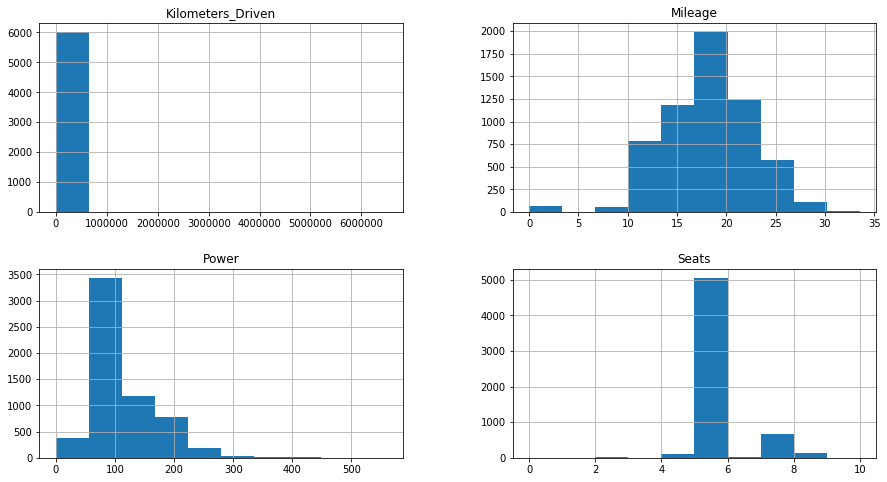

In [30]:
# Univariate visualisation for quantative features
features = ['Kilometers_Driven', 'Mileage','Power','Seats']
data[features].hist(figsize=(15, 8));

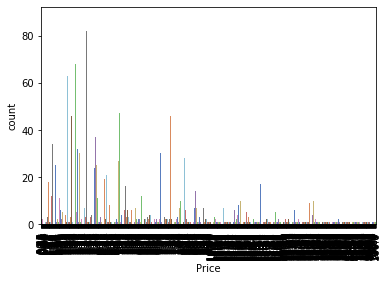

In [31]:
p = sns.countplot(x="Price", data = data, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=90) 


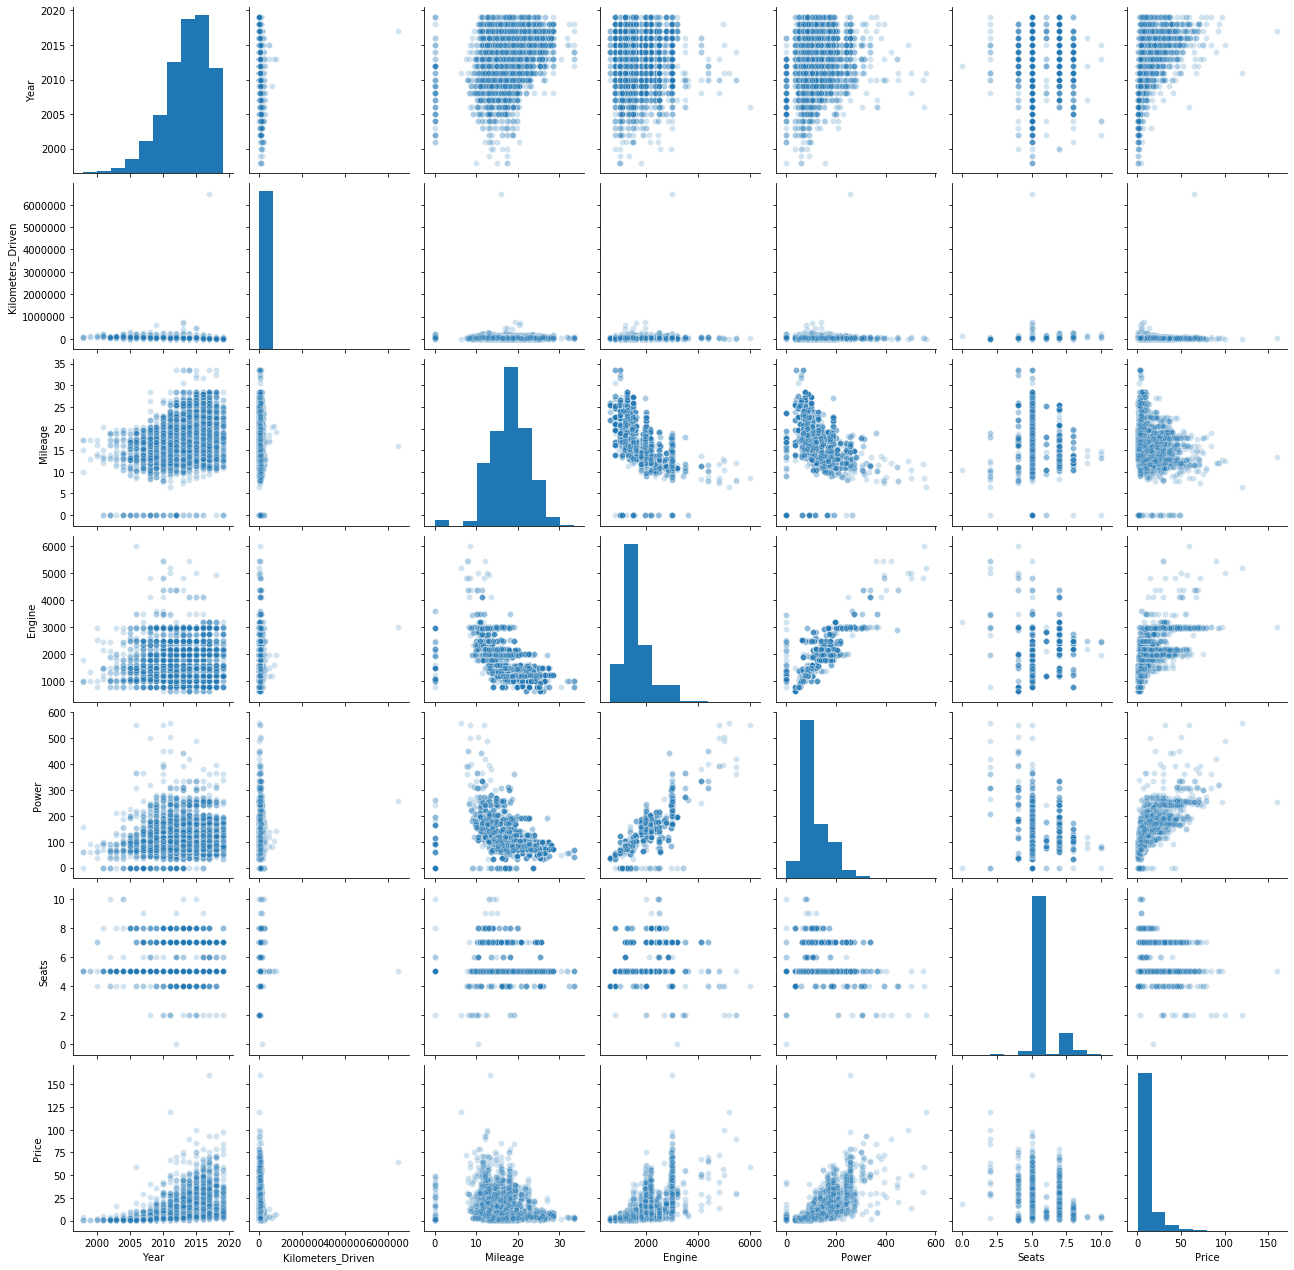

In [32]:
sns.pairplot(data=data,plot_kws={'alpha':0.2})

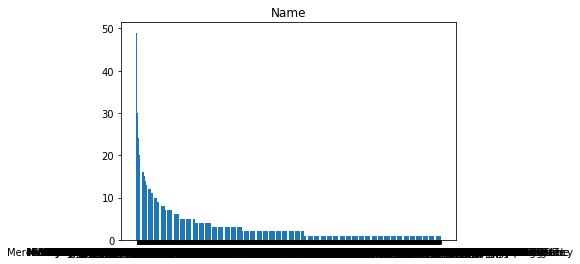

Index(['Mahindra XUV500 W8 2WD', 'Maruti Swift VDI', 'Honda City 1.5 S MT',
       'Maruti Swift Dzire VDI', 'Maruti Swift VDI BSIV', 'Maruti Ritz VDi',
       'Hyundai i10 Sportz', 'Toyota Fortuner 3.0 Diesel',
       'Hyundai Grand i10 Sportz', 'Honda Amaze S i-Dtech',
       ...
       'Maruti Celerio ZXI AT Optional', 'Maruti Celerio ZXI Optional AMT',
       'Maruti Dzire New', 'Maruti Ciaz 1.4 Alpha', 'Maruti Ciaz RS ZXi Plus',
       'Maruti Ciaz VDi', 'Maruti Ciaz ZDi', 'Maruti Dzire AMT VDI',
       'Maruti Dzire AMT VXI', 'Ambassador Classic Nova Diesel'],
      dtype='object', name='Name', length=1874)


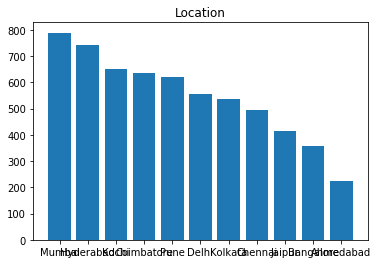

Index(['Mumbai', 'Hyderabad', 'Kochi', 'Coimbatore', 'Pune', 'Delhi',
       'Kolkata', 'Chennai', 'Jaipur', 'Bangalore', 'Ahmedabad'],
      dtype='object', name='Location')


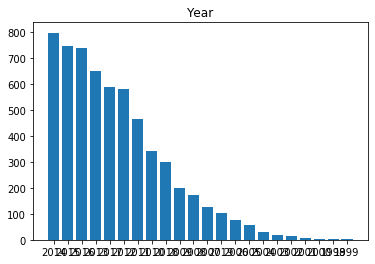

Int64Index([2014, 2015, 2016, 2013, 2017, 2012, 2011, 2010, 2018, 2009, 2008,
            2007, 2019, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1998, 1999],
           dtype='int64', name='Year')


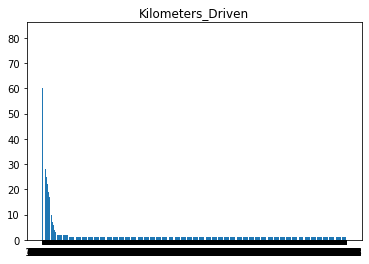

Int64Index([60000, 45000, 65000, 70000, 50000, 55000, 30000, 52000, 75000,
            80000,
            ...
            62001, 61964, 61938, 61932, 61922, 61823, 61795, 61786, 61738,
              171],
           dtype='int64', name='Kilometers_Driven', length=3093)


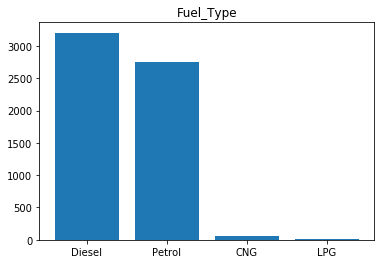

Index(['Diesel', 'Petrol', 'CNG', 'LPG'], dtype='object', name='Fuel_Type')


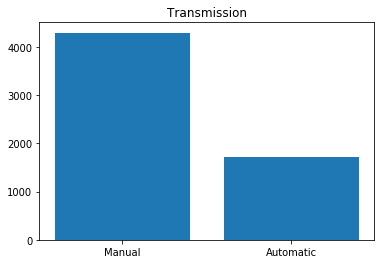

Index(['Manual', 'Automatic'], dtype='object', name='Transmission')


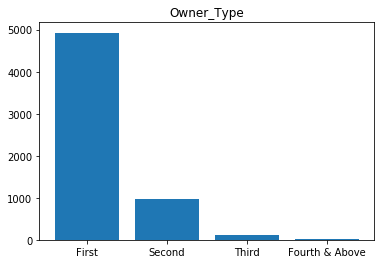

Index(['First', 'Second', 'Third', 'Fourth & Above'], dtype='object', name='Owner_Type')


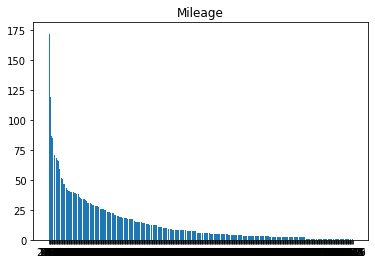

Float64Index([ 17.0,  18.9,  18.6, 20.36,  21.1,  17.8,  16.0,  12.8,  20.0,
               18.0,
              ...
              14.59, 11.62, 14.57, 23.57, 19.68, 14.47, 11.78, 14.45, 23.19,
              17.16],
             dtype='float64', name='Mileage', length=430)


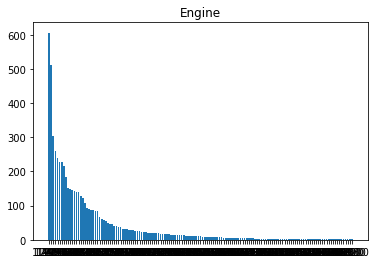

Float64Index([1197.0, 1248.0, 1498.0,  998.0, 2179.0, 1497.0, 1198.0, 1968.0,
              1995.0, 1461.0,
              ...
              2720.0, 3200.0, 3197.0, 2999.0, 2773.0, 2349.0, 1489.0, 1468.0,
              1422.0, 5998.0],
             dtype='float64', name='Engine', length=145)


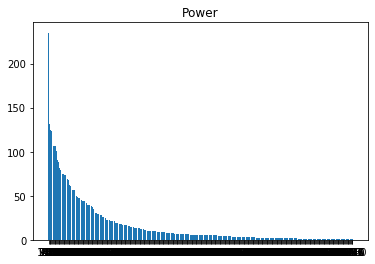

Float64Index([  74.0,   98.6,   73.9,  140.0,   88.5,   78.9,    0.0,  67.04,
                67.1,   82.0,
              ...
               178.4,   76.9, 175.67, 174.57,  168.0,  74.93,  74.96,  161.6,
               156.0,  560.0],
             dtype='float64', name='Power', length=369)


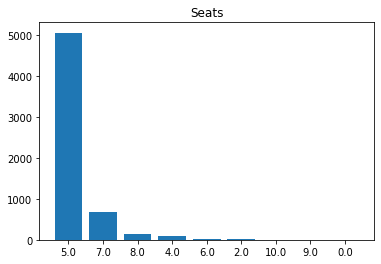

Float64Index([5.0, 7.0, 8.0, 4.0, 6.0, 2.0, 10.0, 9.0, 0.0], dtype='float64', name='Seats')


In [33]:
columns = ['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission','Owner_Type','Mileage','Engine','Power','Seats']
for i, col in enumerate(columns):
    counts = data.groupby(by=col)[col].count().sort_values(ascending=False)
    cat = counts.index
    r = range(len(cat))
    plt.figure()
    plt.title(col)
    plt.bar(r, counts)
    plt.xticks(r, cat)
    plt.show()
    print(cat)

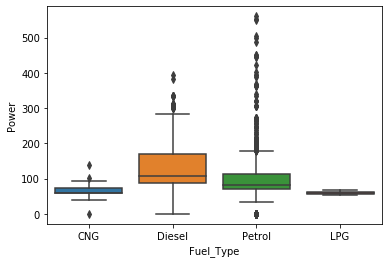

In [34]:
#multivariate visualisation 
sns.boxplot(x = 'Fuel_Type', y = 'Power', data = data) 

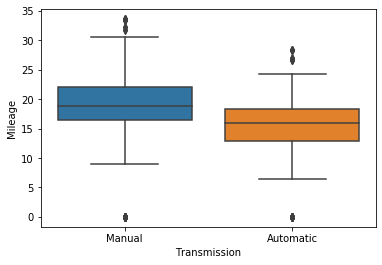

In [35]:
sns.boxplot(x = 'Transmission', y = 'Mileage', data = data)

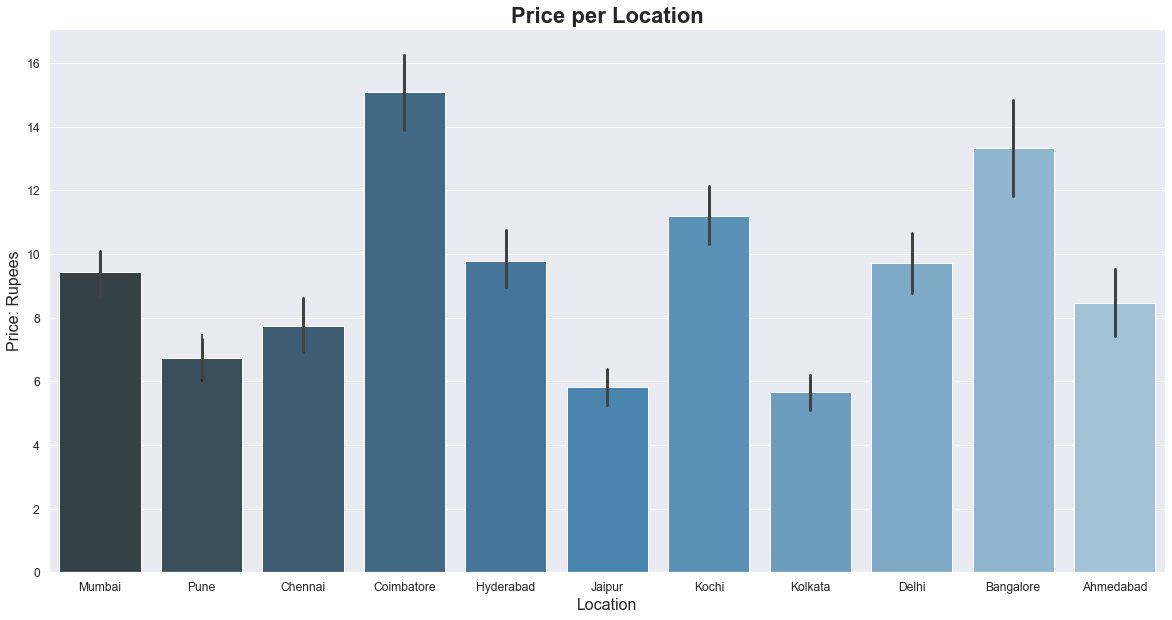

In [36]:
sem_price = data.groupby(['Location'])['Price'].sem().reset_index()
plt.figure(figsize=(20, 10));
sns.set_style("ticks", {"xtick.major.size": 16, "ytick.major.size":8});
sns.set(font_scale=1.1)
fig = sns.barplot(x=data['Location'],y= data['Price'],yerr=sem_price['Price'],errwidth=3,palette="Blues_d")
plt.ylabel('Price: Rupees',fontsize=16);
plt.xlabel('Location',fontsize=16);
plt.xticks()
plt.title('Price per Location',fontsize=22,fontweight='bold');

E:\Anaconda\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
E:\Anaconda\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


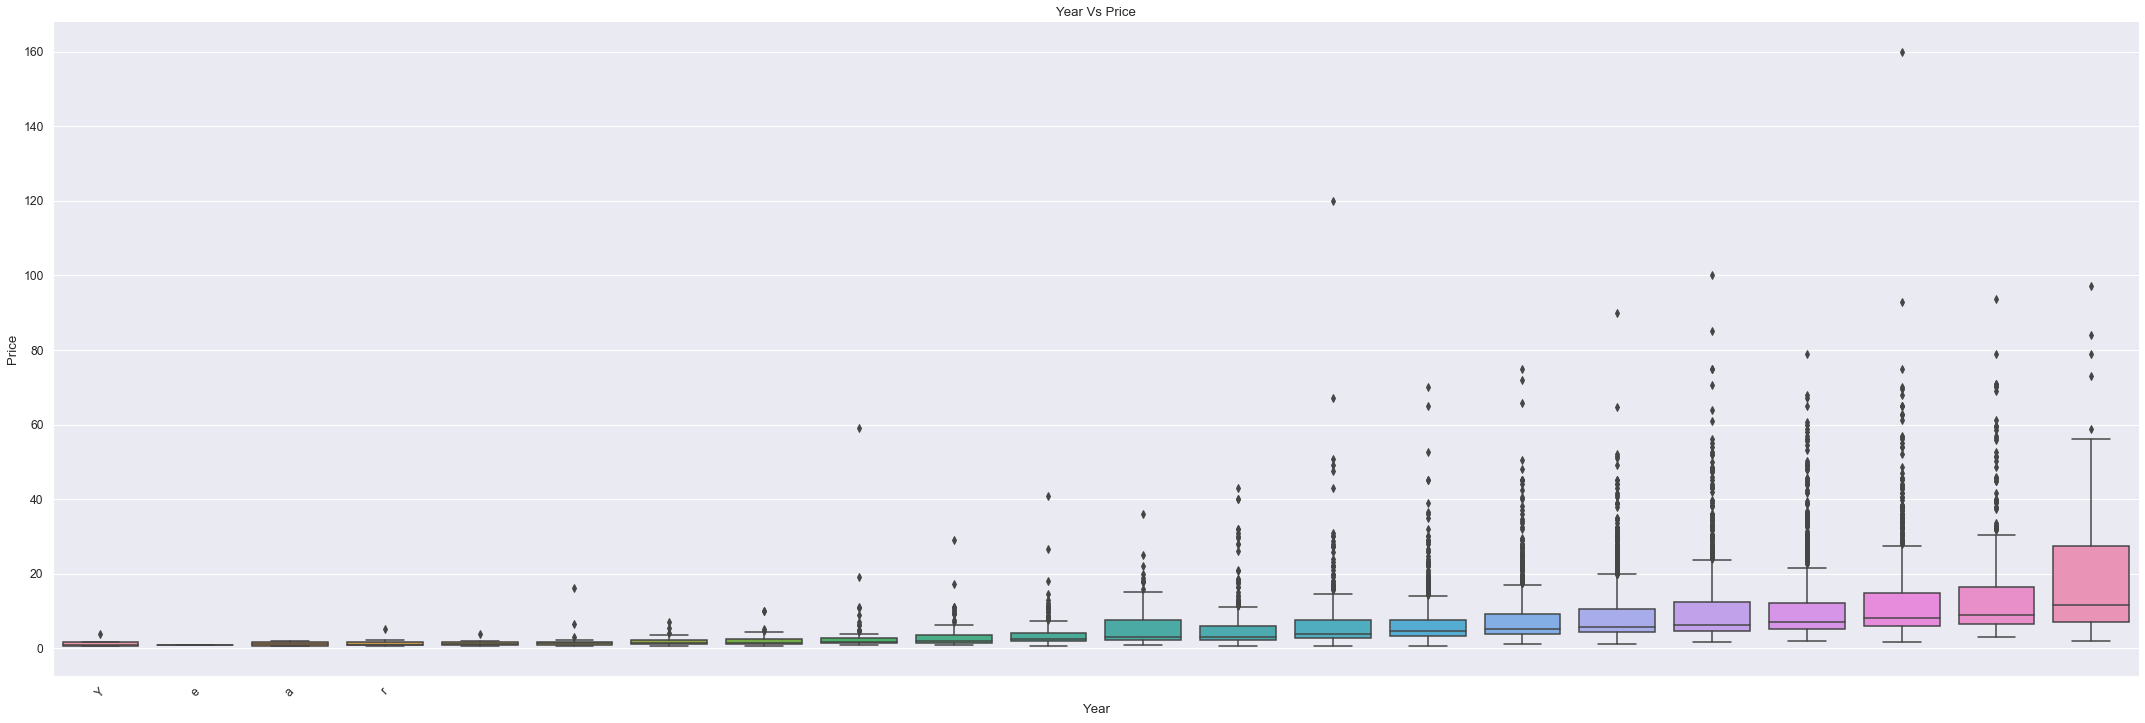

In [37]:
mx = sns.factorplot(x="Year", y="Price", data=data, kind="box", size=10 ,aspect=3)
mx.set(xlabel= 'Year')
mx.set_xticklabels('Year',rotation=45)
mx.set(ylabel= 'Price')
plt.title('Year Vs Price');
plt.show()

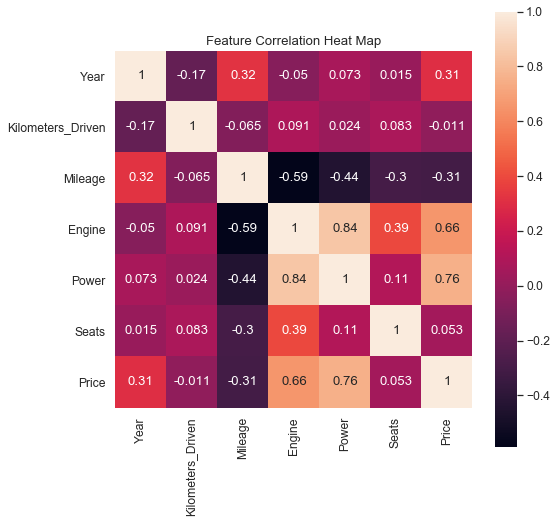

In [38]:
plt.figure(figsize =(8,8))
plt.title('Feature Correlation Heat Map')
sns.heatmap(data.corr(),linewidths=.1,vmax=1.0,
            square=True,linecolor='',annot=True)

From the correlation heat map above, it can be observed that power of the car and Engine have a major influence on the price. It is understandable that the price is dependent on the performance of the used-car and how new it is.

In [39]:
#skewness and kurtosis
print("Skewness: %f" % data['Price'].skew())
print("Kurtosis: %f" % data['Price'].kurt())


Skewness: 3.335125
Kurtosis: 17.088106


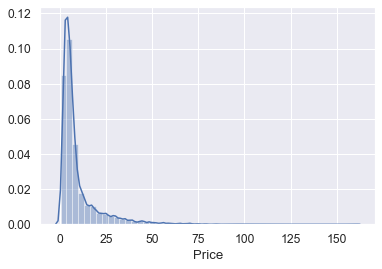

In [40]:
sns.distplot(data['Price'])

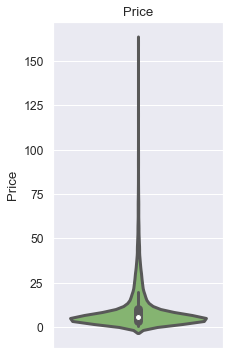

In [41]:
plt.figure(figsize=(14,6))
plt.subplot(1, 4, 1)
plt.title('Price')
sns.violinplot(y='Price',data=data,palette='summer',linewidth=3)
plt.show()

## LABEL ENCODING

In [42]:
data.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

In [43]:
data["Name"] = data["Name"].astype('category')
data.dtypes

Name                 category
Location               object
Year                    int64
Kilometers_Driven       int64
Fuel_Type              object
Transmission           object
Owner_Type             object
Mileage               float64
Engine                float64
Power                 float64
Seats                 float64
Price                 float64
dtype: object

In [44]:
data["Name_Cat"] = data["Name"].cat.codes
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Name_Cat
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,1199
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,512
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,486
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,1058
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,23


In [45]:
data["Location"] = data["Location"].astype('category')
data["Location_Cat"] = data["Location"].cat.codes
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Name_Cat,Location_Cat
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,1199,9
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,512,10
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,486,2
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,1058,2
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,23,3


In [46]:
data["Fuel_Type"] = data["Fuel_Type"].astype('category')
data["Fuel_Type_Cat"] = data["Fuel_Type"].cat.codes
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Name_Cat,Location_Cat,Fuel_Type_Cat
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,1199,9,0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,512,10,1
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,486,2,3
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,1058,2,1
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,23,3,1


In [47]:
data["Transmission"] = data["Transmission"].astype('category')
data["Transmission_Cat"] = data["Transmission"].cat.codes
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Name_Cat,Location_Cat,Fuel_Type_Cat,Transmission_Cat
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,1199,9,0,1
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,512,10,1,1
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,486,2,3,1
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,1058,2,1,1
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,23,3,1,0


In [48]:
data["Owner_Type"] = data["Owner_Type"].astype('category')
data["Owner_Type_Cat"] = data["Owner_Type"].cat.codes
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Name_Cat,Location_Cat,Fuel_Type_Cat,Transmission_Cat,Owner_Type_Cat
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,1199,9,0,1,0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,512,10,1,1,0
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,486,2,3,1,0
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,1058,2,1,1,0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,23,3,1,0,2


In [49]:
data.dtypes

Name                 category
Location             category
Year                    int64
Kilometers_Driven       int64
Fuel_Type            category
Transmission         category
Owner_Type           category
Mileage               float64
Engine                float64
Power                 float64
Seats                 float64
Price                 float64
Name_Cat                int16
Location_Cat             int8
Fuel_Type_Cat            int8
Transmission_Cat         int8
Owner_Type_Cat           int8
dtype: object

## DATA SCALING

In [50]:
#using normalization formula:X-X(min)/X(max)-X(min)
M=data['Kilometers_Driven'].max() 
m=data['Kilometers_Driven'].min()
data['Kilometers_Driven']=(data['Kilometers_Driven']-m)/(M-m)

In [51]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Name_Cat,Location_Cat,Fuel_Type_Cat,Transmission_Cat,Owner_Type_Cat
0,Maruti Wagon R LXI CNG,Mumbai,2010,0.011051,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,1199,9,0,1,0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,0.006282,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,512,10,1,1,0
2,Honda Jazz V,Chennai,2011,0.007051,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,486,2,3,1,0
3,Maruti Ertiga VDI,Chennai,2012,0.013359,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,1058,2,1,1,0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,0.006231,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,23,3,1,0,2


We have seen that by scaling the column Kilometer_Driven the values of that column are ranging from 0 to 1, which balances all values.

In [52]:
data=data.drop(['Name','Location','Fuel_Type','Transmission','Owner_Type'],axis=1)

In [53]:
data.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Name_Cat,Location_Cat,Fuel_Type_Cat,Transmission_Cat,Owner_Type_Cat
0,2010,0.011051,26.60,998.0,58.16,5.0,1.75,1199,9,0,1,0
1,2015,0.006282,19.67,1582.0,126.20,5.0,12.50,512,10,1,1,0
2,2011,0.007051,18.20,1199.0,88.70,5.0,4.50,486,2,3,1,0
3,2012,0.013359,20.77,1248.0,88.76,7.0,6.00,1058,2,1,1,0
4,2013,0.006231,15.20,1968.0,140.80,5.0,17.74,23,3,1,0,2


## TRAIN TEST SPLIT

In [54]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(data.loc[:,data.columns!='Price'],data['Price'],test_size=0.2,random_state=1)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(4813, 11) (4813,)
(1204, 11) (1204,)


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error

E:\Anaconda\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


## ML REGRESSION ALGORITHMS

### 1. LINEAR REGRESSION:

In [56]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred= linear_reg.predict(X_test)
print("The score on the training set with linear regression is: ",linear_reg.score(X_train,y_train))
print("The score on the testing set with linear regression is: ",linear_reg.score(X_test,y_test))

The score on the training set with linear regression is:  0.6807564491276643
The score on the testing set with linear regression is:  0.42899098788304635


In [57]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("R2 score:",r2_score(y_pred, y_test))
y_pred_dt=linear_reg.predict(X_test)
print("Mean squared error: %2f"%np.sqrt(mean_squared_error(y_test,y_pred_dt)))

R2 score: 0.3701791683394713
Mean squared error: 7.837260


**Analysis**<br>
As we can see that the R2 Score of my model is positive,this shows that my model is performing well but the R2 score should be close to 1 for best performance,so we will try applying some other different models to improve our performance. 

### 2. DECISION TREE REGRESSOR:

In [58]:
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

D_T = tree.DecisionTreeRegressor(max_depth=8,random_state=42)
D_T.fit(X_train, y_train)
y_pred_dt = D_T.predict(X_test)
print('The Score on the training set with a decision tree regressor is:',D_T.score(X_train,y_train))
print('The Score on the test set with a decision tree regressor is:',D_T.score(X_test,y_test))

# The Root mean squared error
print("Mean squared error: %.2f"% np.sqrt(mean_squared_error(y_test, y_pred_dt)))

# The R^2 score 
print("The r2_score is: ", r2_score(y_test, y_pred_dt))

The Score on the training set with a decision tree regressor is: 0.9479236932117063
The Score on the test set with a decision tree regressor is: 0.8015183635688985
Mean squared error: 4.62
The r2_score is:  0.8015183635688985


**Analysis**<br>
We see that by using the Decision regdression tree model the R2 score is coming out to be 0.8 which shows our model is very good.(if the R2 score of the model is near to 0 then the model is considered to be bad and a R2 score near to 1 is considered to be a good model)

### 3. KNN:

In [59]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

neigh = KNeighborsRegressor(n_neighbors=15)
neigh.fit(X_train,y_train)
k_pred=neigh.predict(X_test)
print('The Score on the test set with a K neighbours regression is:', neigh.score(X_test,y_test))
print("Accuracy :",neigh.score(X_test,y_test)*100,'%')

# The Root mean squared error
print("Root Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test,k_pred )))

# The R^2 score 
print("The r2_score is: ", r2_score(y_test, k_pred))

The Score on the test set with a K neighbours regression is: 0.7379680654773118
Accuracy : 73.79680654773118 %
Root Mean squared error: 5.31
The r2_score is:  0.7379680654773118


**Analysis**<br>
We see that by using the KNN model the R2 score is coming out to be ~0.7 which shows our model is fairly good.(if the R2 score of the model is near to 0 then the model is considered to be bad and a R2 score near to 1 is considered to be a good model)

### 4. RANDOM FOREST REGRESSOR:

In [60]:
from sklearn.ensemble import RandomForestRegressor

rand_est = RandomForestRegressor()
rand_est.fit(X_train,y_train)
y_pred = rand_est.predict(X_test)
print('The Score on the test set with a random forest regressor is:', rand_est.score(X_test,y_test))
print("Root Mean squared error: %.2f"
      % np.sqrt(mean_squared_error(y_test, y_pred)))
print("Accuracy :",rand_est.score(X_test,y_test)*100,'%')
print("The r2_score is: ", r2_score(y_test, y_pred))

The Score on the test set with a random forest regressor is: 0.9064687812002661
Root Mean squared error: 3.17
Accuracy : 90.64687812002661 %
The r2_score is:  0.9064687812002661


In [61]:
from sklearn.ensemble import RandomForestRegressor

rand_est = RandomForestRegressor(max_depth=20, n_estimators= 200, min_samples_split= 5, min_samples_leaf= 1, bootstrap= True, max_features= 'auto')
rand_est.fit(X_train,y_train)
y_pred_rfr = rand_est.predict(X_test)
print(' The Score on the train set with a hyperparameter optimized random forest regressor is:',rand_est.score(X_train,y_train))
print(' The Score on the test set with a hyperparameter optimized random forest regressor is:',rand_est.score(X_test,y_test))
print("Root Mean squared error: %.2f"
      % np.sqrt(mean_squared_error(y_test, y_pred_rfr)))
print("The r2_score is: ", r2_score(y_test, y_pred))

 The Score on the train set with a hyperparameter optimized random forest regressor is: 0.9735799981923835
 The Score on the test set with a hyperparameter optimized random forest regressor is: 0.9112711949230293
Root Mean squared error: 3.09
The r2_score is:  0.9064687812002661


**Analysis**<br>
We see that by using the RANDOM FOREST REGRESSOR model the R2 score is coming out to be 0.9 which shows our model is really good.(if the R2 score of the model is near to 0 then the model is considered to be bad and a R2 score near to 1 is considered to be the best model)

# PREDICTIONS:

**The final dataset**

In [62]:
X_test.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Name_Cat,Location_Cat,Fuel_Type_Cat,Transmission_Cat,Owner_Type_Cat
5463,2005,0.012130,13.40,1794.0,125.0,5.0,1701,3,3,1,0
4367,2007,0.018467,13.93,2179.0,138.0,7.0,1625,2,1,1,2
1227,2013,0.007512,14.59,1997.0,245.0,5.0,88,10,3,0,0
2253,2015,0.004512,20.40,1197.0,81.8,5.0,1152,2,3,1,0
79,2005,0.013450,0.00,1086.0,0.0,5.0,601,5,3,1,0


In [63]:
test2=X_test

In [64]:
import pickle 
  
# Save the trained model as a pickle string. 
saved_model = pickle.dumps(D_T) 
# Load the pickled model 
D_T_from_pickle = pickle.loads(saved_model) 
# Use the loaded pickled model to make predictions 
Prediction_1=D_T_from_pickle.predict(test2.values) 

# Save the trained model as a pickle string. 
saved_model2 = pickle.dumps(rand_est) 
# Load the pickled model 
rand_est_from_pickle = pickle.loads(saved_model2) 
# Use the loaded pickled model to make predictions 
Prediction_2=rand_est_from_pickle.predict(test2.values)

In [65]:
prediction1=pd.DataFrame(Prediction_1)
prediction1

,0
0,2.941250
1,2.941250
2,35.674286
3,5.327740
4,1.177738
...,...
1199,17.863750
1200,2.941250
1201,18.890968
1202,5.097138


In [66]:
prediction2=pd.DataFrame(Prediction_2)
prediction2

,0
0,2.170266
1,3.318912
2,32.894128
3,5.496860
4,1.439030
...,...
1199,18.733460
1200,2.972982
1201,20.485958
1202,4.814554


# CONCLUSION:

### ->BEST MODEL

We can compare all the models by checking their R2 score.<br>
Condition: <br>
* If R2 score is near to 1 -> Best model<br>
* If R2 score is near to 0 -> Worst model<br>

**Models**<br>
Linear Regression :-     0.37<br>
Decison tree Regressor:-      0.80<br>
K Nearest Neighbours(KNN):- 0.73<br>
Random Forest Regressor:- 0.90<br>

So from observing the "R2 score" we conclude that *RANDOM FOREST REGRESSOR* is the best model for predicitng the price of the second hand car. 

### ->SUMMARY OF THE STEPS FOLLOWED

* Reading of the data<br>
* Cleaning of the data by removing the null values for filling them with the median values. Also we took care of the outliers present in the dataframe.<br>
* Next was the EDA (Exploratory Data Analysis) in which we did a disciptive analysis of the entire dataframe with the help of mathematical values and visualization by checking the relation between the variables both independent and dependent. <br>
* Next we performed Label Encoding to deal with the categorical variables present.<br>
* Next we have done the Scaling of the variable "Kilometers_Driven" to remove the units and make it fall in the range of 0 to 1 so as to avoid any favourable decisons by large or small values.<br>
* Then we have splitted the dataframe into train and test cases to carry on the predictions.<br>
* Mean Square Error (MSE) and Root Mean Square Error (RMSE) methods were used to determine the error in the model.<br> 
* The Final step involved us using the different ML Algorithms so as to get the best model out of all for our price prediction.<br>